<a href="https://colab.research.google.com/github/udaysinh-git/College-SEM-5-AIML/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 2

Step 1 import libraries

In [28]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Step 2 - load the dataset

In [29]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


step 3 select features

In [30]:
# select features

X = df.iloc[:,:-1]


step 4


In [31]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df.head()
df['cluster'] = kmeans.fit_predict(X)


print("\nCluster Centers:", kmeans.cluster_centers_)


Cluster Centers: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [32]:
score = silhouette_score(X, df["cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.551191604619592


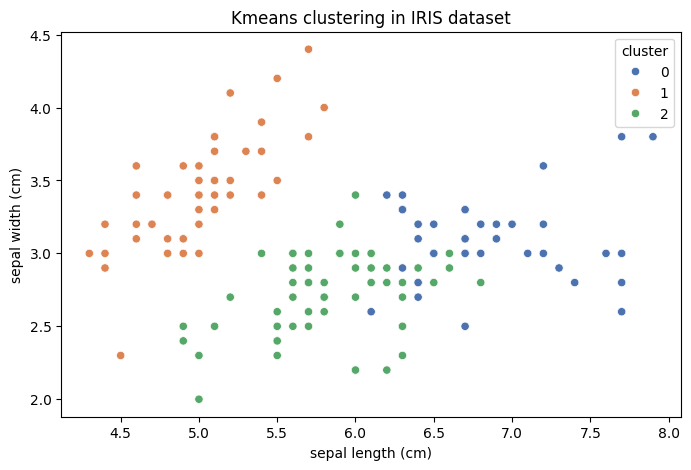

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['sepal length (cm)'],
    y=df['sepal width (cm)'],
    hue=df['cluster'],
    palette='deep',
)

plt.title("Kmeans clustering in IRIS dataset")
plt.show()

Standard Scalar

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
pca= PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [36]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = df['target']

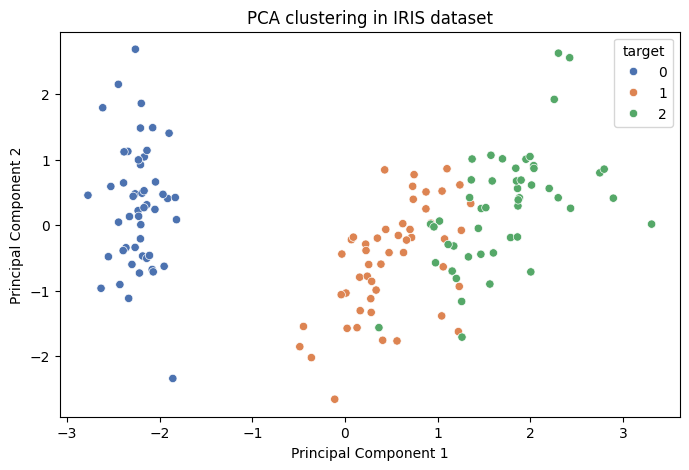

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    hue=pca_df['target'],
    palette='deep',
)

plt.title("PCA clustering in IRIS dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [40]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72962445 0.22850762]
